In [18]:
#Import packages and test log grabbing with grok

from pygrok import Grok
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sb
%matplotlib inline

text = '108.28.249.14 - - [27/Apr/2023:18:49:00 +0000] "GET /images/executive-members/etosgpvkce2b0fc9904330b616e4.jpeg HTTP/2.0" 499 0 "https://rspnepal.org/" "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_5) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/13.1.1 Safari/605.1.15"'
pattern = '\A%{IP:ip} - - \[%{HTTPDATE:timestamp}\] "%{WORD:method} %{URIPATHPARAM:path} %{URIPROTO:protocol}/%{NUMBER:version}" %{NUMBER:response_code} %{NUMBER:content_length} "%{GREEDYDATA:referrer}" "%{GREEDYDATA:user_agent}"'
grok = Grok(pattern)
print(grok.match(text))

{'ip': '108.28.249.14', 'timestamp': '27/Apr/2023:18:49:00 +0000', 'method': 'GET', 'path': '/images/executive-members/etosgpvkce2b0fc9904330b616e4.jpeg', 'protocol': 'HTTP', 'version': '2.0', 'response_code': '499', 'content_length': '0', 'referrer': 'https://rspnepal.org/', 'user_agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_5) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/13.1.1 Safari/605.1.15'}


In [19]:
#parses and arranges the logs into a dictionary of lists

data = {'ip':[],
        'timestamp':[],
        'method':[],
        'path':[],
        'protocol':[],
        'version':[],
        'response_code':[],
        'content_length':[],
        'referrer':[],
        'user_agent':[]
       }




f = open("oa_access.log", "r")
c=0
for x in f:
    a = grok.match(x)
    try:
        for i in a:
            data[i].append(a[i])
    except TypeError:  #incase of failure to parse some logs continue
        c = c+ 1
        continue
print("total none value detected is " + str(c))
 




total none value detected is 212


In [20]:
# generates a dataframe
df = pd.DataFrame(data)#user_agent
display(df)

,ip,timestamp,method,path,protocol,version,response_code,content_length,referrer,user_agent
0,188.166.249.235,17/May/2023:06:33:02 +0545,GET,/api/v1/leave?from_date=2023-05-16&to_date=202...,HTTP,1.0,200,5950,-,-
1,188.166.249.235,17/May/2023:06:33:02 +0545,GET,/api/v1/profiles?apikey=LYlCVppaglroXNP5Hs1VvH...,HTTP,1.1,200,313344,-,GuzzleHttp/6.5.5 curl/7.47.0 PHP/7.2.34-18+ubu...
2,110.44.123.47,17/May/2023:06:33:06 +0545,GET,/api/v1/profiles?apikey=LYlCVppaglroXNP5Hs1VvH...,HTTP,1.1,200,313524,-,python-requests/2.21.0
3,128.199.116.13,17/May/2023:06:33:15 +0545,GET,/api/v1/profiles?apikey=LYlCVppaglroXNP5Hs1VvH...,HTTP,1.0,200,313571,-,-
4,188.166.232.203,17/May/2023:06:33:37 +0545,GET,/,HTTP,1.1,200,6788,-,Go-http-client/1.1
...,...,...,...,...,...,...,...,...,...,...
19871,110.44.120.201,17/May/2023:22:27:55 +0545,GET,/api/v1/user-rp?from=2023-05-17&to=2023-05-17,HTTP,1.1,200,7159,-,Dart/2.16 (dart:io)
19872,188.166.249.235,17/May/2023:22:28:02 +0545,GET,/api/v1/profiles?apikey=LYlCVppaglroXNP5Hs1VvH...,HTTP,1.1,200,313350,-,GuzzleHttp/6.5.5 curl/7.47.0 PHP/7.2.34-18+ubu...
19873,188.166.249.235,17/May/2023:22:28:04 +0545,GET,/api/v1/leave?from_date=2023-05-16&to_date=202...,HTTP,1.0,200,5950,-,-
19874,110.44.123.47,17/May/2023:22:28:14 +0545,GET,/api/v1/profiles?apikey=LYlCVppaglroXNP5Hs1VvH...,HTTP,1.1,200,313530,-,python-requests/2.21.0


In [25]:
df.describe()

,ip,timestamp,method,path,protocol,version,response_code,content_length,referrer,user_agent
count,19876,19876,19876,19876,19876,19876,19876,19876,19876,19876
unique,112,8818,3,599,1,2,10,2397,47,39
top,110.44.123.47,17/May/2023:16:21:36 +0545,GET,/api/v1/profiles?apikey=LYlCVppaglroXNP5Hs1VvH...,HTTP,1.1,200,5950,-,Dart/2.16 (dart:io)
freq,8491,59,18964,2915,19876,17834,18958,964,14970,9772


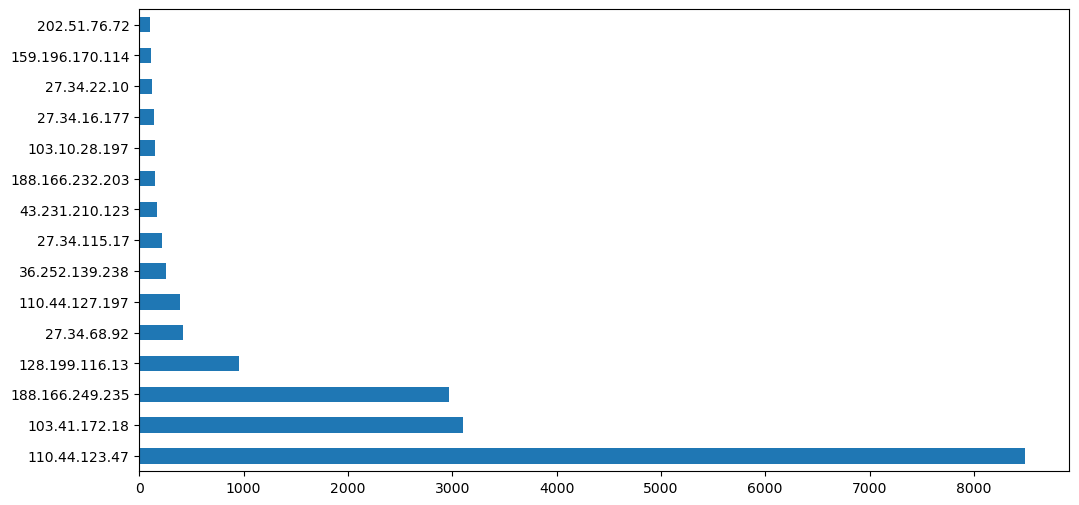

In [58]:
#display most active remote clients

ips = df.ip.value_counts()
top_10_ips = ips.iloc[0:15]
top_10_ips
type(top_10_ips)
horizontal_bar= top_10_ips.plot(kind='barh',figsize=(12,6))


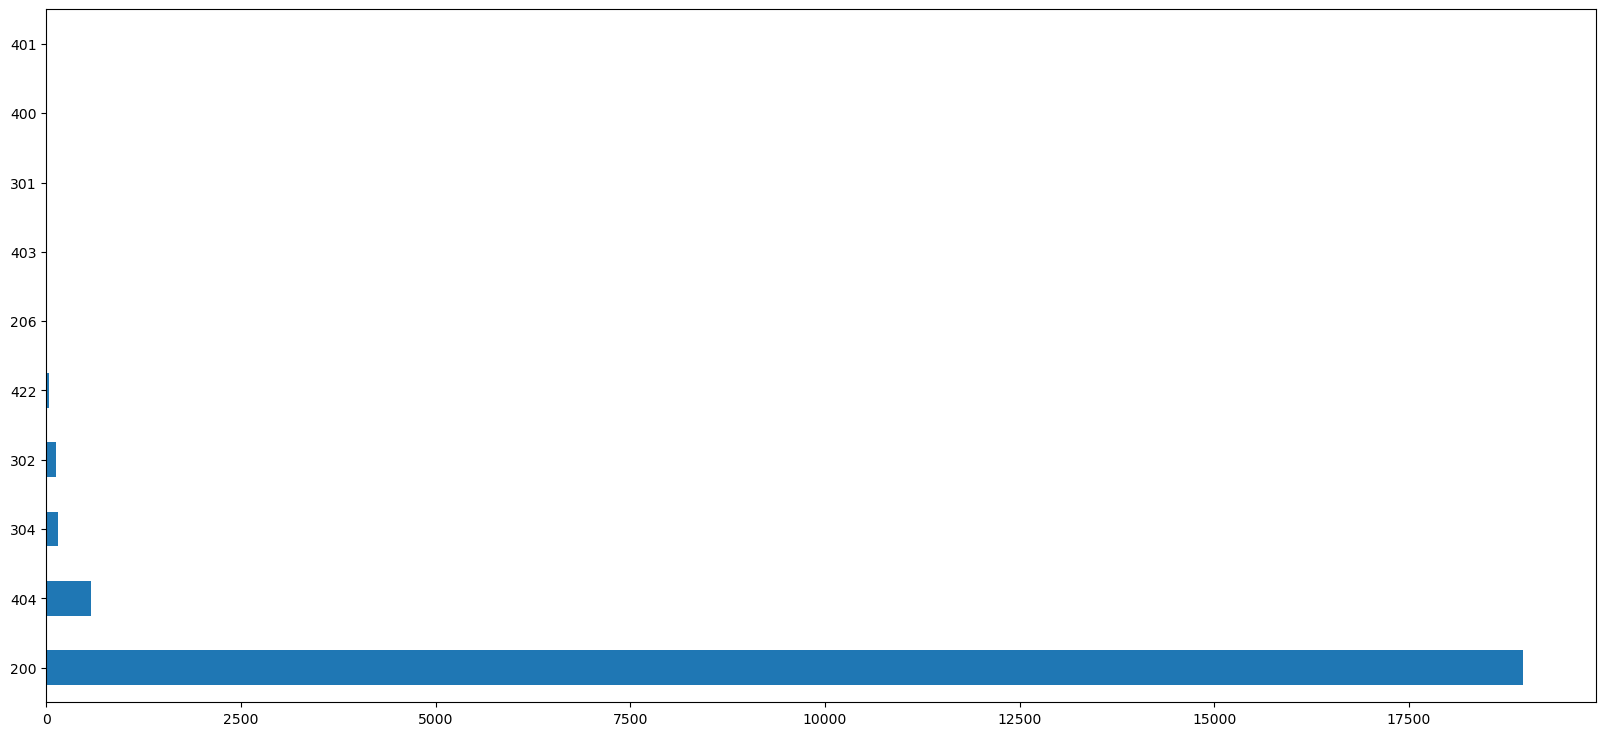

In [68]:
response_code = df.response_code.value_counts()
response_code.describe()
horizontal_bar= response_code.plot(kind='barh',figsize=(20,9))

<AxesSubplot: xlabel='ip', ylabel='count'>

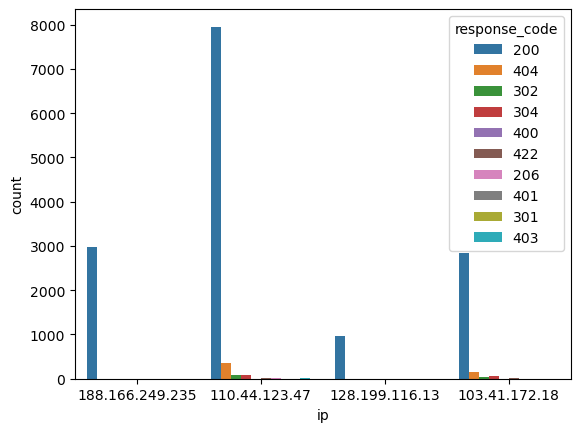

In [69]:
top_5_ips = ips.iloc[0:4]

sb.countplot(x='ip', data=df[df.ip.isin(top_5_ips.index)],hue='response_code')

(array([1.8964e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        9.1000e+02, 0.0000e+00, 0.0000e+00, 0.0000e+00, 2.0000e+00]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

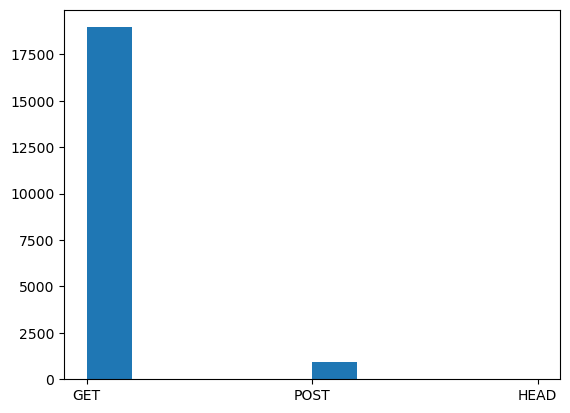

In [8]:
plt.hist(df['method'])